### 【課題】CNNとはどういった手法なのか記述せよ

答え：  
ディープラーニングとはニューラルネットワークを多層構造化したものである。そしてCNNとはニューラルネットワークにconvolution(畳み込み)を追加したものである。  
convolution(畳み込み)とは何か？  
CNNは主に画像認識に使われるが、その画像認識に於いて画像を１ピクセルではなくフィルタと呼ばれる任意の小領域を設定する。  
これをひとつの特徴量として圧縮＝（畳み込み）するのがconvolutionである。   
この畳み込み処理をストライドさせて画像全体に適用させて出来るのがconvolution Layerである。

### 【課題】畳み込み層とプーリング層について記述せよ

答え：  
ニューラルネットワークは全結合層（Affine Layer）のみで構成されており、隣接する層のニューロンが全て連結されている。    
全結合層の問題点は「データの形状が無視されてしまう」所にある。なので形状の空間的な情報が活かせない。  
一方で畳み込み層（convolution layer）は形状を維持する。画像の場合、入力データを３次元のデータとして受け取り３次元のデータとして次の層にデータを出力する。そのためCNNでは画像などの形状を有したデータを正しく理解出来る可能性が高い。  
尚、畳み込み層の処理を行う前にパディングと言って入力データの周囲に固定のデータ（例えば０など）を埋める事がある。  
パディングを行う目的は出力サイズの調整を行うためである。続いて、フィルターを適用する位置の間隔をストライドと言う。  ストライドを大きくすると出力サイズは小さくなる。  
プーリング層（pooling layer）とは、縦、横方向の空間を小さくする演算。例えば２x２の領域をひとつの要素に集約するような処理を行い、空間サイズを小さくする層である。

### 【課題】CNNの精度を向上させるためにはどのようなことをするのが良いか記述せよ

答え：  
1.フィルタ数を複数にする。  
2.全結合層のノード数を増やしたり、全結合層をもう１枚増やす。  
3.畳み込み層とプーリング層をもう少し深くしてみる。  
4.層を深くする事による過学習を防ぐためにドロップアウトを適用する。学習時、更新毎にノードをランダムに抜け落とす。

### ※ 必要なライブラリをインポートする

In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### 【課題】データの読み込み

In [274]:
from keras.datasets import cifar10

(x_train , y_train) , (x_test , y_test ) = cifar10.load_data()

### ※データセットの確認

In [275]:
print('x_train' , x_train.shape)
print('y_train' , y_train.shape)
print('x_test' , x_test.shape)
print('y_test' , y_test.shape)
print('y_test[0:10]' , y_test[0:10])

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)
y_test[0:10] [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


### ※データセットの可視化

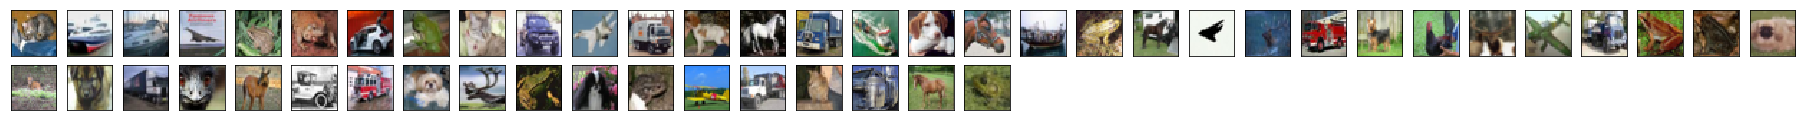

In [14]:
fig = plt.figure(figsize=(32,32))
for i in range(50):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape((32, 32,3)))
plt.show()

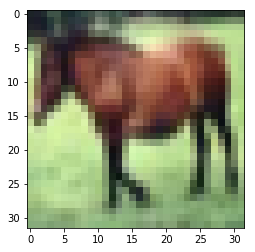

In [138]:
# 指定したラベルのインデックスを取得する

tmp = np.where(y_train==7)[0][0]

plt.imshow(x_train[tmp])

### 【課題】画像をまとめて表示

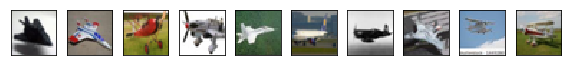

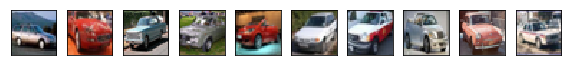

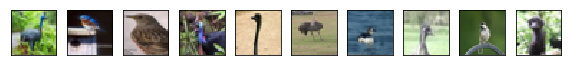

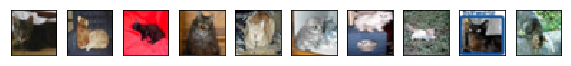

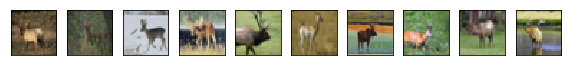

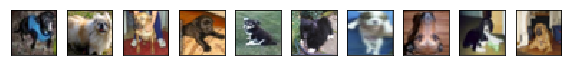

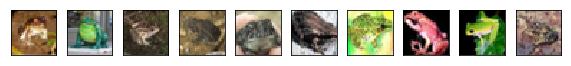

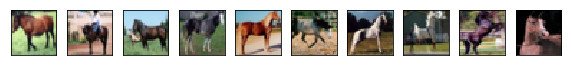

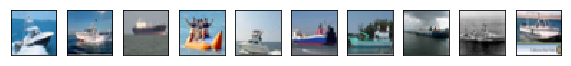

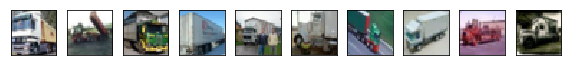

In [135]:
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==0)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==1)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==2)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))    

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==3)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))        

fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==4)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))        

    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==5)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))   

    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==6)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))   
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==7)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))   
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==8)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))   
    
fig = plt.figure(figsize=(32,32))
for i in range(10):
    ax = fig.add_subplot(32, 32, i + 1, xticks=[], yticks=[])
    tmp = np.where(y_train==9)[0][i]
    ax.imshow(x_train[tmp].reshape(32,32,3))   
    

plt.show()

### 【課題】大きさの取得

In [179]:
print(x_train[0].shape)

(32, 32, 3)


In [276]:
# 画像サイズの取得

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

#分類する数を取得

y_train = y_train.flatten()
num_classes = len(set(y_train))

#入力データの形状を取得


x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols ,3)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols ,3)
input_shape =  x_train.shape[1:4]

x_test.shape

(10000, 32, 32, 3)

### 【課題】正規化

In [277]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [281]:
y_train.shape

(50000,)

### 【課題】one-hot表現への変換

In [282]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [284]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


### 【課題】モデルを作成

In [285]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Input ,Dense
from keras.layers import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense


model = Sequential()

In [286]:
# AlexNet

model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11),
                 strides=(4, 4),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(384, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [267]:
y_train.shape

(500000,)

### 【課題】このようなモデルにした理由

答え：ディープラーニングブームのきっかけになったAlexNetを使って見たかったのと、ここまで深い層のモデルを今まで試した事がなかったので試して見たかった。でも計算したところ、ハイパーパラメータをいじってないので精度が低いです。

### 【課題】CNNの実行

In [288]:
model.fit(x_train, y_train,
          batch_size=100,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 515s 10ms/step - loss: 1.6083 - acc: 0.4110 - val_loss: 1.7894 - val_acc: 0.4114

In [289]:
score = model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 19s 2ms/step

In [290]:
print('Test loss:' , score[0])
print('Test accuracy:' , score[1])

Test loss: 1.71860145054
Test accuracy: 0.4586
